<a href="https://github.com/hernansalinas/autogrades/tree/main/Evaluaciones/Evaluacion01_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Parcial 01: Metodos computacionales para fisicos 
### Fecha 3/30/23

La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno. 

## 1. (50%). Movimiento de una esfera de radio r en un fluido.

 Una esfera de radio $R$ que asciende o desciende por un fluido puede ser modelada a través de un modelo de partícula, sometida a tres fuerzas: el peso, el empuje y la fuerza rozamiento. Las  ecuaciones de posición (x) y velocidad (v) para un sistema de refencia úbicado en la base del fluido, pueden ser escritas como:

\begin{equation}
x = \frac{G}{\alpha} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}



donde $G=\left( 1-\frac{\rho_f}{\rho} \right)g$, con $\rho_f$, $\rho$ la densidad del fluido y la esfera respectivamente y $g=9.8$ la aceleración de la gravedad y $\alpha$  una constante que depende del radio de la esfera, la viscosidad y la densidad.
$\alpha=\frac{9\eta}{2R^2\rho}$.

Suponga que una esferita de radio $R=2\times10^{-5}m$ es lanzada verticalmente hacia arriba en el agua, con una rapidez de $v_0=0.01$m/s.
Tomando la densidad del agua en  $\rho_f =1000 kg/m^3$,  la densidad de la esfera en $\rho=2670 kg/m^3$ y la viscosidad en $\eta=0.001 kg/ms$.  Determine: 

1. El tiempo total en que la esfera asciende  y desciende. 

2. Determine la rapidez final, con la que llega nuevamente de donde fue lanzada. 



Para ello construya un programa en python que:
- Permita calcular la posición como función del tiempo
- Permita calcular la rapidez como función del tiempo
- Cálcule  el tiempo total de subida y bajada empleando el método de la secante.

 



In [17]:
import numpy as np
from scipy.optimize import newton 
import matplotlib.pylab as plt

In [171]:
#Definamos los datos 
g=9.8 #m/s2
R=2e-05 #m
v0=0.01 #m/s
#densidad del fluido
df=1000 #kg/m3
d_es=2670 #kg/m3 densidad de la esfera 
𝜂=0.001 #kg/ms # viscosidad 
#con los anteriores datos hallemos G y 𝛼
G=(1-(df/d_es))
𝛼=(9*𝜂)/(2*R**2*d_es)

\begin{equation}
x = \frac{G}{\alpha} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}


In [172]:
#Definamos una funcion que calcule x(t)
def x(t):
  term1=(G/(𝛼**2))*(1+(𝛼*v0)/G)
  term2=1-np.exp(-𝛼*t)
  term3=(G/𝛼)*t
  return term1*term2-term3

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}


In [174]:
#Definamos una funcion que calcule v(t
def v(t):
  term1=(v0+G/𝛼)*np.exp(-𝛼*t)
  term2=G/𝛼
  return term1-term2

In [175]:
#Cálcule el tiempo total de subida y bajada empleando el método de la secante.
#Para esto se requiere encontrar el tiempo cuya posicion vuelve a x =0 lo que equivale a encontrar 
#una raiz de la funcion definida anteriormente como x 
time=newton(x,x0=60,x1=80)
print(f'El tiempo total de subida y bajada es :{np.round(time,3)} segundos ')

El tiempo total de subida y bajada es :0.016 segundos 


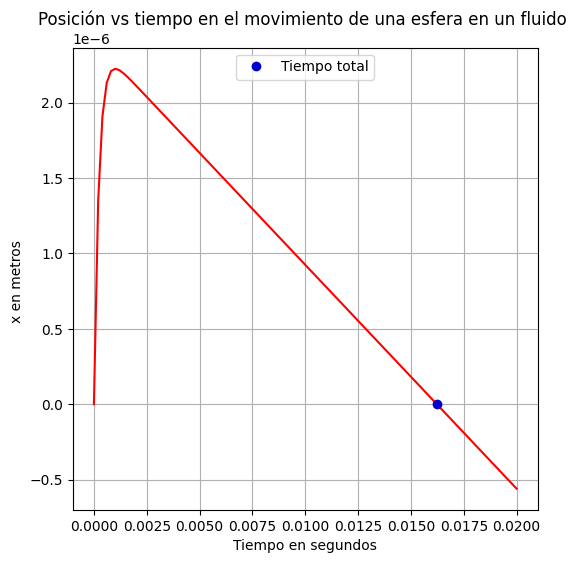

In [177]:
#Gráfica de x vs t de una esfera en un fluido 
t=np.linspace(0,0.02,100)
plt.figure(figsize=(6,6))
plt.plot(t,x(t),color='red')
plt.plot(time,x(time),'o',color='mediumblue',label='Tiempo total')
plt.xlabel('Tiempo en segundos')
plt.ylabel('x en metros ')
plt.title('Posición vs tiempo en el movimiento de una esfera en un fluido ')
plt.legend(loc='upper center')
plt.grid()

In [49]:
#se comprueba 
x(time )

0.0

In [178]:
#Determine la rapidez final, con la que llega nuevamente de donde fue lanzada.
v_f=v(time)
#La anterior da negativa por el sistema de referencia 

#La rapidez es el abs(velocidad) entonces 
r_p=abs(v_f)
print(f'''La velocidad final y la rapidez final son respetivamente :

{round(v_f,6)} m/s y {round(r_p,6)} m/s

''')

La velocidad final y la rapidez final son respetivamente :

-0.000148 m/s y 0.000148 m/s




## 2. (50%). Interpolación
Para los siguientes datos de temperatura media como función del tiempo de los últimos años de  Bogotá y Barcelona ([Temperature_Bogota_Barcelona](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)). Aplique el método de  hermite y spline cúbicos. Para ello realice lo siguiente:

1. Leer el dataset desde la url, con el comando pd.read_csv.
2. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$
3. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.
4. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.
4. Aplique el  metodos de interpolación de hermite para Bogotá y el metodo de interpolación de splines cubicos para Barcelona. 


Ayuda :

| Comando | Descripción |
| --- | --- |
| pd.read_csv() | Lee un archivo CSV y lo convierte en un DataFrame de Pandas |
| pd.read_excel() | Lee un archivo de Excel y lo convierte en un DataFrame de Pandas |
| pd.read_json() | Lee un archivo JSON y lo convierte en un DataFrame de Pandas |
| df.head() | Muestra las primeras filas del DataFrame |
| df.tail() | Muestra las últimas filas del DataFrame |
| df.info() | Muestra información sobre el DataFrame |
| df.describe() | Muestra estadísticas descriptivas del DataFrame |
| df.dropna() | Elimina filas con valores faltantes |
| df.drop_duplicates() | Elimina filas duplicadas |
| df.groupby() | Agrupa el DataFrame por una o más columnas |
| df.sort_values() | Ordena el DataFrame por una o más columnas |
| df.to_csv() | Guarda el DataFrame como un archivo CSV |
| df.loc[condicion] | Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones |
| df[df["columna"]== x] | Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable |


Referencias: 

- Dataset tomado y modificado de : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

- http://www.sc.ehu.es/sbweb/fisica3/fluidos/stokes_1/stokes_1.html
- Lindemuth J. The effect of air resistance on falling balls. Am. J. Phys. 39, July 1971, pp. 757-759


In [179]:
import pandas as pd 
import matplotlib.pylab as plt

In [181]:
#leer el dataset
url="https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv"
data=pd.read_csv(url)

In [183]:
#Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius.  𝐶=(𝐹−32)/1.8 
TempC=np.zeros(len(data['AvgTemperature']))
for u,i in enumerate(data['AvgTemperature']):
    C=(i-32)/18
    TempC[u]=C

#Añado la nueva columna   
data=data.assign(AvgTempCelcius=TempC)

In [ ]:
data

In [185]:
#filtremos los datos de bogotá 
bogota=data[data['City']=='Bogota']

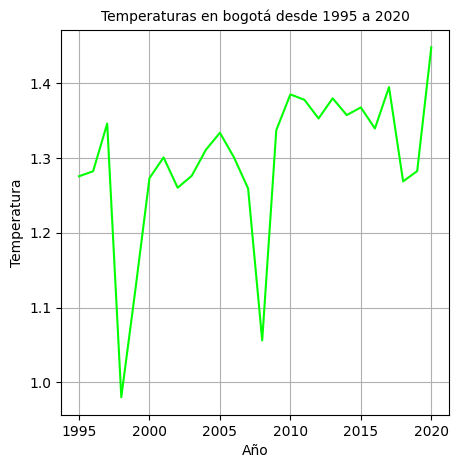

In [188]:
#Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.
añosb=bogota['Year']
celcius_bo=bogota['AvgTempCelcius']
plt.figure(figsize=(5,5))
plt.plot(añosb,celcius_bo,color='lime')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.title('Temperaturas en bogotá desde 1995 a 2020',fontsize=10)
plt.grid()

In [191]:
##filtremos los datos de barcelona
barcelona=data[data['City']=='Barcelona']
añosbar=barcelona['Year']
celcius_bar=barcelona['AvgTempCelcius']

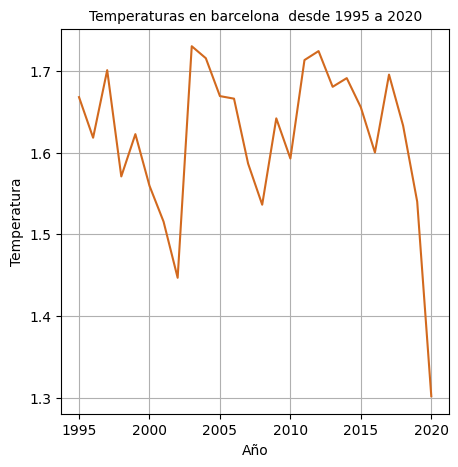

In [193]:
#Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.
plt.figure(figsize=(5,5))
plt.plot(añosbar,celcius_bar,color='chocolate')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.title('Temperaturas en barcelona  desde 1995 a 2020',fontsize=10)
plt.grid()

In [194]:
#Aplicando  el metodo de interpolación de hermite para Bogotá 
from scipy.interpolate import CubicHermiteSpline
#Para él método de Hermite necesitamos dy/dx
der1=np.diff(celcius_bo)
P_=CubicHermiteSpline(añosb[1:],celcius_bo[1:],der1)

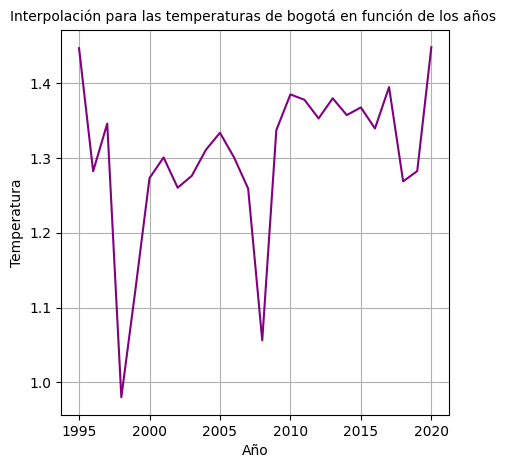

In [195]:
#Gráfica de la interpolación para Bogotá
plt.figure(figsize=(5,5))
#plt.plot(añosb,celcius_bo,color='lime')
plt.plot(añosb,P_(añosb),color='purple')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.title('Interpolación para las temperaturas de bogotá en función de los años ',fontsize=10)
plt.grid()

In [196]:
#Aplicando el metodo de interpolación de splines cubicos para Barcelona.
from scipy.interpolate  import CubicSpline
#polinomio de interpolacion 
p=CubicSpline(añosbar,celcius_bar)

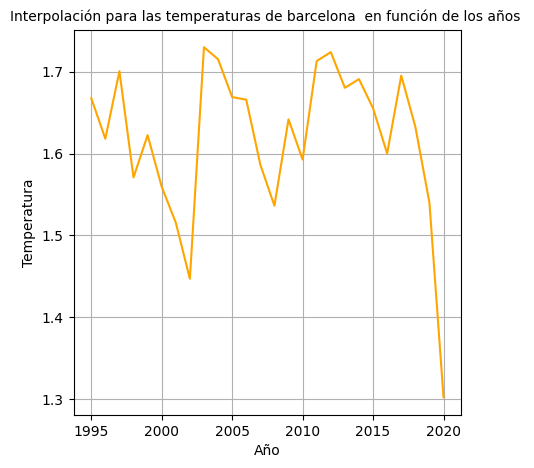

In [197]:
#Gráfico de interpolación 
plt.figure(figsize=(5,5))
#plt.plot(añosbar,celcius_bar,color='chocolate')
plt.plot(añosbar,p(añosbar),color='orange' )
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.title('Interpolación para las temperaturas de barcelona  en función de los años ',fontsize=10)
plt.grid()